In [43]:
#Uniform Distribution
#get numbers from 50-300

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
#100 numbers between 50 and 300

n_samples = 100
TV = np.random.uniform(50, 300, n_samples)
radio = np.random.uniform(10, 100, n_samples)
social = np.random.uniform(5, 50, n_samples)

#y = m1x1 + m2x2 + m3x3 + b
sales = 0.8 * TV + 0.6 * radio + 0.3 * social + 5 + np.random.normal(0, 10, n_samples)
print(sales)

[183.18731429 278.42381497 147.93640085 216.26718371 187.19878319
 205.62381997  76.70738731 159.21237182 111.55981205 139.9867908
 143.84434079 310.65626377 250.92979905 102.34419179  88.6562251
 212.22932331 214.09935006 175.99092498 124.64191911 178.7242328
 166.33471676 261.11984157 188.78020511 186.51499164 150.79150291
 258.551036   130.30033824 106.18235887 256.69154876 232.07868587
 242.96428839  99.23954178 260.07475277 193.55286372 249.54981055
 172.17429219 200.96308878 224.10682336 151.87301316 179.69255625
 240.4500559  148.86082691 226.87317514  80.06867099 243.38919907
 226.68081513 183.97814469 213.33530821 174.50679894 261.16563257
 220.4757726  176.82388948 114.75506664  83.9948572  120.49014003
 234.86727316 200.07257121 169.49785239 232.01413059 283.07656603
 242.87998983 113.194958   265.66860465 202.32295574  87.0010313
 303.56770294 238.1773053  193.17513061 138.09160089 182.47655714
 102.3529159   82.65944174 233.87677573 192.4507093   94.94336472
 266.49778257 

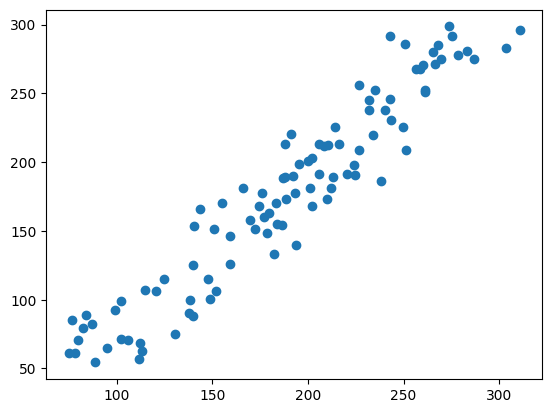

In [54]:
plt.scatter(sales, TV)

In [87]:
df = pd.DataFrame({"TV": TV, "Radio": radio, "Social": social, "SALES": sales})
df.head(20)

,TV,Radio,Social,SALES
0,170.231423,87.959621,9.948789,183.187314
1,278.103750,76.488055,41.807942,278.423815
2,115.119686,72.578920,47.860823,147.936401
3,213.185367,90.201257,5.802131,216.267184
4,188.378329,45.273795,42.367370,187.198783
5,191.168864,43.255583,34.328475,205.623820
6,85.341889,12.792075,31.282704,76.707387
7,146.289343,56.737729,5.078428,159.212372
8,56.704337,57.973465,20.581060,111.559812
9,87.929382,98.854137,46.316032,139.986791


In [83]:
from sklearn.linear_model import LinearRegression

X = df[['TV']]
y = df[["SALES"]]

#fit 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [85]:
X_range = np.linspace(df['TV'].min(), df['TV'].max(), 100).reshape(-1, 1)

# X_range

y_pred = model.predict(X_range)
model.coef_
model.intercept_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.47173092])

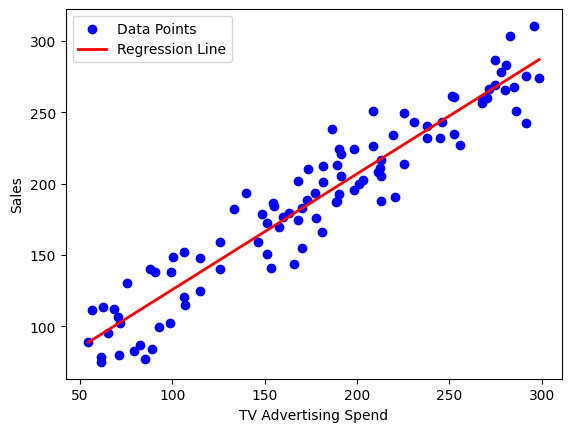

In [71]:
#plot scatter and regression line
plt.scatter(df['TV'], df['SALES'], color='blue', label='Data Points')
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [76]:
#MSE

from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(df["SALES"], y_pred)
# mse2 = ((df['SALES'] - y_pred)**2).mean()

mse

80.24238148335861

In [91]:
X = df[["TV", "Radio", "Social"]]
Y = df["SALES"]

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

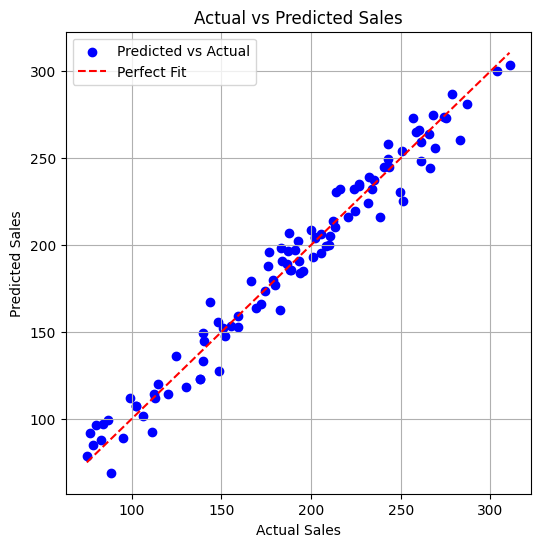

In [92]:
plt.figure(figsize=(6, 6))
plt.scatter(Y, predictions, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
model.coef_
model.intercept_
#sales = 0.79*tv + 0.59*radio + 0.28*social+ 44.47

array([7.08498031])

In [94]:
mse = root_mean_squared_error(df["SALES"], predictions)
mse

10.640669552892753

In [95]:
#training and testing

from sklearn.model_selection import train_test_split

#split 80-20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Steps:
Split the data into training and test sets.

Train the model using model.fit(X_train, Y_train).

Predict on the test set: Y_pred = model.predict(X_test).

Evaluate performance (e.g., RMSE, R²) on Y_test vs Y_pred.



In [96]:
model = LinearRegression()
model.fit(X_train, Y_train)

model.coef_

array([0.79300215, 0.59821494, 0.25142106])

In [98]:
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_pred, Y_test)
mse

11.292002058196518

In [101]:
#no traiing and testing here
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv = 5, scoring = "r2")
print(scores)
np.mean(scores)

[0.95294553 0.96237831 0.96038723 0.97302625 0.97238309]


0.9642240821696916

In [120]:
#cross validation with trainign and testing

#given a number return prime factors, assuming integer numbs 120 -> 60 -> 30 -> 15 -> 5 -> 1
res = []
def f(n):
    if n == 1:
        return res
    for i in range(2, n+1):
        if n % i == 0:
            res.append(i)
            # print(res)
            return f(n//i)




    


Input: 
s = "apple banana apple grape"
word1 = "apple"
word2 = "grape"

Output: 
6
Explanation:
The closest midpoint is between the second "apple" (index 15) and "grape" (index 21).


In [136]:
def midpoint(s, w1, w2):
    #find indices of w1
    l = 0
    hash_words = {w1: [], w2: []}
    while l < len(s):
        if s[l:l+len(w1)] == w1:
            print("found")
            if len(w1) % 2 == 1:
                hash_words[w1].append(l + ((len(w1) - 1)//2)) #the index of the midpoint for odd would be,,, starting index + (len(w1) - 1)/2
            else:
                hash_words[w1].append(l + ((len(w1))//2))
            l += len(w1)
        else: l += 1
        
    
    l = 0; r = 0
    while l < len(s):
        if s[l: l+len(w2)] == w2:
            if len(w2) % 2 == 1:
                hash_words[w2].append(l + ((len(w2) - 1)//2)) #the index of the midpoint for odd would be,,, starting index + (len(w1) - 1)/2
            else:
                hash_words[w2].append(l + ((len(w2))//2))
            l += len(w2)
        else: l += 1

    p1 = hash_words[w1]
    p2 = hash_words[w2]

    if not p1 or not p2:
        return -1
    min_dist = float('inf')

    for a in p1:
        for g in p2:
            min_dist = min(min_dist, abs(a - g))
    return min_dist

midpoint(s = "apple banana grape apple", w1 = "apple", w2 = "grape")

found
found


6